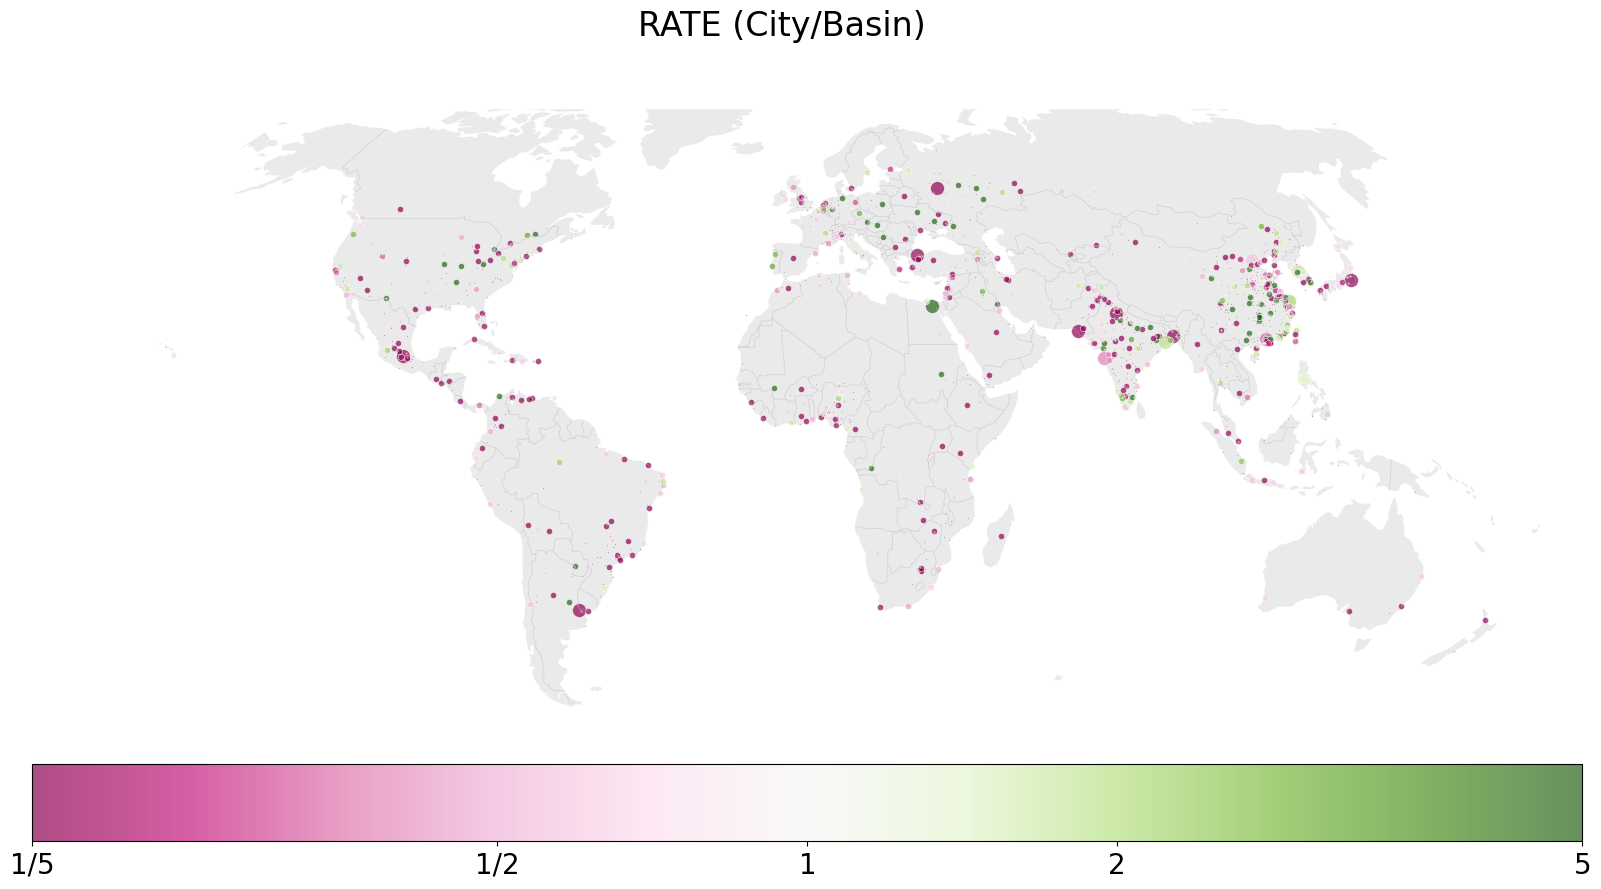

In [58]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
city_path = f'{h08dir}/wsi/dat/cmy/cmy_citylonlat.npy'
basin_path = f'{h08dir}/wsi/dat/cmy/cmy_basinlonlat.npy'
city_list = np.load(city_path)
basin_list = np.load(basin_path)

mcy_path = f"{h08dir}/wsi/dat/potential/updown_potential.txt"
with open(mcy_path, 'r') as files:
    text = files.readlines()

population = []
mpcy_lst = []
for ind in range(1, 1861):
    line = text[ind]
    parts = line.split('|')
    parts = [item.strip() for item in parts]
    city_num = int(parts[0])
    flag = parts[1]
    if flag == 'NoMASK':
        continue
    else:
        rate = parts[2]
        wup = float(parts[3])
        wup_unit = wup / 1e3
        dwn = float(parts[4])
        dwn_unit = dwn
        ava = float(parts[5])
        ava_unit = ava / 1e9
        mcy = float(parts[6])

    mpcy_lst.append(mcy)
    population.append(dwn_unit)
pop_array = np.array(population)

RATE = []
DIFF = []
for i, j, k in zip(city_list, basin_list, mpcy_lst):
    rate = k / j[3]
    diff = k - j[3]
    RATE.append((i[0], i[1], i[2], rate))
    DIFF.append((i[0], i[1], i[2], diff))

diff_array = np.array(DIFF)
percentile = 50
max_abs_diff = np.percentile(np.abs(diff_array[:, 3]), percentile)
diff_tmp = diff_array[:, 3] / max_abs_diff
diff_array[:, 3] = diff_tmp

rate_array = np.array(RATE)
rate_tmp = np.empty(len(rate_array))
for i in range(len(rate_array)):
    rate_tmp[i] = np.where(rate_array[i, 3] > 1, rate_array[i, 3], -1 / rate_array[i, 3])
rate_array[:, 3] = rate_tmp

def plot_world(array, norm, cmap, extent):
    plt.rcParams["font.size"] = 20
    projection = ccrs.Robinson(central_longitude=0)
    crs = ccrs.PlateCarree()
    fig, ax = plt.subplots(figsize=(20, 10), edgecolor='none', subplot_kw={'projection': projection})
    ax.set_extent(extent, crs=crs)
    
    for i, pop in zip(array, pop_array):
        if pop >= 1e7:
            size = 100
        elif 1e6 <= pop and pop < 1e7:
            size = 20
        else:
            size = 1
        ax.scatter(i[1], i[2], c=i[3], s=size, cmap=cmap, norm=norm,
                   transform=ccrs.PlateCarree(), alpha=0.7, edgecolor='white', linewidth=0.5)
        
    ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
    ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='white')
    ax.add_feature(cfeature.COASTLINE, linewidth=0.1, edgecolor='#d0cfd4')
    ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5, edgecolor='#d0cfd4')
    ax.spines['geo'].set_visible(False)
    
    cbar = fig.colorbar(ax.collections[0], ax=ax, orientation='horizontal', pad=0.05)
    cbar.set_ticks([-2, 0, 2])  # Ticksの設定
    cbar.set_ticklabels(['1/2', '1', '2'])  # Tick labelsの設定
    fig.suptitle('RATE (City/Basin)')
    plt.show()

cmap_base = plt.get_cmap('PiYG')
colors = cmap_base(np.linspace(0, 0.9, cmap_base.N))
white_to_gray = np.linspace(1, 0.7, cmap_base.N // 2)
for i in range(cmap_base.N // 2, cmap_base.N):
    colors[i] = [white_to_gray[i - cmap_base.N // 2]] * 3 + [1]
cmap_custom = LinearSegmentedColormap.from_list('PiYG_custom', colors)

extent = [-180, 180, -60, 75]
norm = mcolors.TwoSlopeNorm(vcenter=0, vmin=-2, vmax=2)
#plot_world(rate_array, norm, cmap_custom, extent)
plot_world(rate_array, norm, cmap_base, extent)

1024
529
(1553, 4)
1236.35100178125
567.656887796875


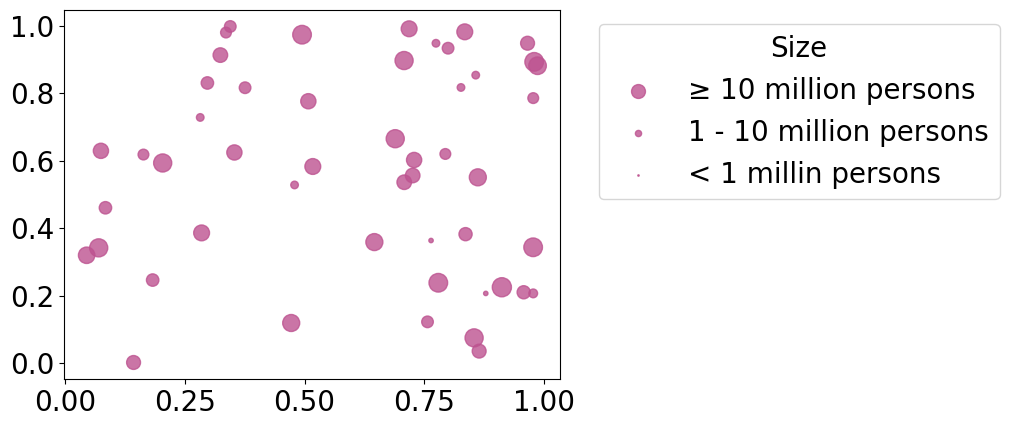

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# サンプルデータ
x = np.random.rand(50)
y = np.random.rand(50)
sizes = np.random.randint(1, 20, size=50) * 10  # 点のサイズ

# scatter plotの作成
plt.scatter(x, y, s=sizes, color='#bd5390', alpha=0.8)

# 凡例の作成
handles = [
    plt.scatter([], [], s=100, color='#bd5390', alpha=0.8, label='≥ 10 million persons'),
    plt.scatter([], [], s=20, color='#bd5390', alpha=0.8, label='1 - 10 million persons'),
    plt.scatter([], [], s=1, color='#bd5390', alpha=0.8, label='< 1 millin persons')
]

# 凡例をプロット
plt.legend(handles=handles, title='Size', bbox_to_anchor=(1.05, 1), loc='upper left')

pop_array = np.array(population)
negative_num = [i[3] for i in rate_array if i[3] < 0]
positive_num = [i[3] for i in rate_array if i[3] > 0]
print(len(negative_num))
print(len(positive_num))
print(rate_array.shape)

negative_pop = [pop for rate, pop in zip(rate_array[:, 3], pop_array) if rate < 0]
print(sum(negative_pop)/1e6)
positive_pop = [pop for rate, pop in zip(rate_array[:, 3], pop_array) if rate > 0]
print(sum(positive_pop)/1e6)

81604
0.0
81603.0


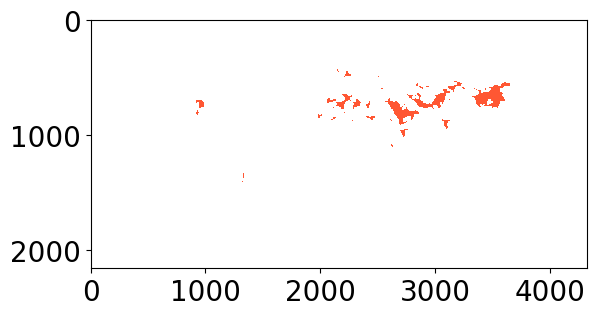

In [102]:
h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
pop_path = f'{h08dir}/global_city/dat/pop_tot_/GPW4ag__20100000.gl5'
pop = np.fromfile(pop_path, dtype='float32').reshape(2160, 4320)
riv_path = f'{h08dir}/wsi/dat/riv_out_/W5E5LR__00000000.gl5'
rivout = np.fromfile(riv_path, dtype='float32').reshape(2160, 4320)
rivnum_path = f'{h08dir}/global_city/dat/riv_num_/rivnum.CAMA.gl5'
rivnum = np.fromfile(rivnum_path, dtype='float32').reshape(2160, 4320)
rivara_path = f'{h08dir}/global_city/dat/riv_ara_/rivara.CAMA.gl5'
rivara = np.fromfile(rivara_path, dtype='float32').reshape(2160, 4320)
lndmsk_path = f'{h08dir}/global_city/dat/lnd_msk_/lndmsk.CAMA.gl5'
lndmsk = np.fromfile(lndmsk_path, dtype='float32').reshape(2160, 4320)

uids = np.unique(rivnum)
print(len(uids))
print(uids[0])
print(uids[-1])

"""
uids = np.unique(rivnum)
world = np.zeros((2160, 4320))
for i, uid in enumerate(uids):
    mask = (rivnum == uid)
    pop_basin = pop[mask]
    pop_sum = np.sum(pop_basin)
    rivara_masked = np.ma.masked_where(~mask, rivara)
    largest_rivara_index = np.argmax(rivara_masked)
    largest_rivara_coords = np.unravel_index(largest_rivara_index, rivara.shape)
    supply = rivout[largest_rivara_coords]
    supply_sum = np.sum(supply) * 60 * 60 * 24 * 365 / 1000
    if pop_sum == 0:
        cmy = 0
    else:
        cmy = supply_sum/pop_sum
        
    if np.sum(world[mask]) < 1:
        world[mask] = cmy
        
    if i % 1000 == 0:
        print(i)
"""

def geography(left, right, bottom, top):
    #
    resolution = 12
    #
    upperindex = (90-top)*resolution
    lowerindex = (90-bottom)*resolution
    leftindex = (180+left)*resolution
    rightindex = (180+right)*resolution
    #
    rgnshape = (lowerindex-upperindex, rightindex-leftindex)
    #
    img_extent = (left, right, bottom, top)
    
    return upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent
    
loadpath = f'{h08dir}/wsi/dat/MPCY/world_basin_mpcy.npy'
world = np.load(loadpath)
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(-180, 180, -90, 90)
lndmsk_cropped = lndmsk[upperindex:lowerindex, leftindex:rightindex]
region = world[upperindex:lowerindex, leftindex:rightindex]
region_lnd = np.ma.masked_where(lndmsk_cropped==0, region)
#region_lnd[region_lnd==0] = -1
region_masked = np.ma.masked_where(region_lnd==0, region_lnd)
light_basin = np.ma.masked_where(region_masked>=1700, region_masked)
heavy_basin = np.ma.masked_where(region_masked>=1000, region_masked)
color = '#ff5733'  # オレンジ色 (好きな色を指定)
cmap = LinearSegmentedColormap.from_list('single_color_cmap', [color, color], N=256)
plt.imshow(light_basin, cmap=cmap)
plt.show()

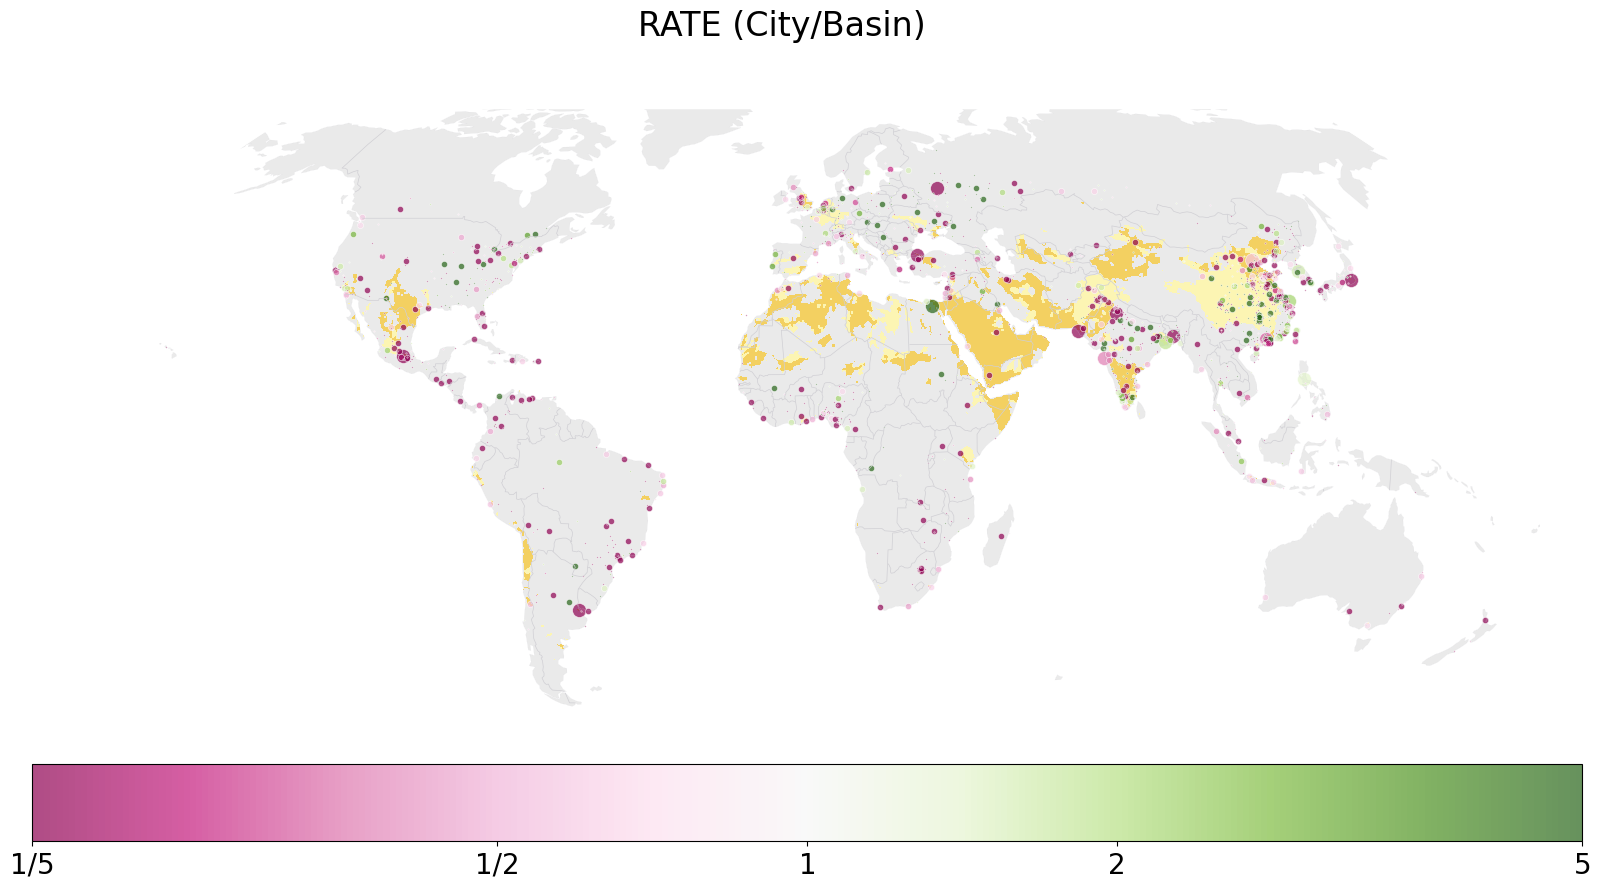

In [105]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
city_path = f'{h08dir}/wsi/dat/cmy/cmy_citylonlat.npy'
basin_path = f'{h08dir}/wsi/dat/cmy/cmy_basinlonlat.npy'
city_list = np.load(city_path)
basin_list = np.load(basin_path)

mcy_path = f"{h08dir}/wsi/dat/potential/updown_potential.txt"
with open(mcy_path, 'r') as files:
    text = files.readlines()

population = []
mpcy_lst = []
for ind in range(1, 1861):
    line = text[ind]
    parts = line.split('|')
    parts = [item.strip() for item in parts]
    city_num = int(parts[0])
    flag = parts[1]
    if flag == 'NoMASK':
        continue
    else:
        rate = parts[2]
        wup = float(parts[3])
        wup_unit = wup / 1e3
        dwn = float(parts[4])
        dwn_unit = dwn
        ava = float(parts[5])
        ava_unit = ava / 1e9
        mcy = float(parts[6])

    mpcy_lst.append(mcy)
    population.append(dwn_unit)
pop_array = np.array(population)

RATE = []
DIFF = []
for i, j, k in zip(city_list, basin_list, mpcy_lst):
    rate = k / j[3]
    diff = k - j[3]
    RATE.append((i[0], i[1], i[2], rate))
    DIFF.append((i[0], i[1], i[2], diff))

diff_array = np.array(DIFF)
percentile = 50
max_abs_diff = np.percentile(np.abs(diff_array[:, 3]), percentile)
diff_tmp = diff_array[:, 3] / max_abs_diff
diff_array[:, 3] = diff_tmp

rate_array = np.array(RATE)
rate_tmp = np.empty(len(rate_array))
for i in range(len(rate_array)):
    rate_tmp[i] = np.where(rate_array[i, 3] > 1, rate_array[i, 3], -1 / rate_array[i, 3])
rate_array[:, 3] = rate_tmp

def plot_world(array, norm, cmap, extent):
    plt.rcParams["font.size"] = 20
    projection = ccrs.Robinson(central_longitude=0)
    crs = ccrs.PlateCarree()
    fig, ax = plt.subplots(figsize=(20, 10), edgecolor='none', subplot_kw={'projection': projection})
    ax.set_extent(extent, crs=crs)
    
    for i, pop in zip(array, pop_array):
        if pop >= 1e7:
            size = 100
        elif 1e6 <= pop and pop < 1e7:
            size = 20
        else:
            size = 1
        ax.scatter(i[1], i[2], c=i[3], s=size, cmap=cmap, norm=norm,
                   transform=ccrs.PlateCarree(), alpha=0.7, edgecolor='white', linewidth=0.5)
        
    light_cmap = mcolors.ListedColormap(['#fcf5b3'])
    ax.imshow(light_basin, transform=ccrs.PlateCarree(), cmap=light_cmap)
    heavy_cmap = mcolors.ListedColormap(['#f3d061'])
    ax.imshow(heavy_basin, transform=ccrs.PlateCarree(), cmap=heavy_cmap)
        
    ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
    ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='white')
    ax.add_feature(cfeature.COASTLINE, linewidth=0.1, edgecolor='#d0cfd4')
    ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5, edgecolor='#d0cfd4')
    ax.spines['geo'].set_visible(False)
    
    cbar = fig.colorbar(ax.collections[0], ax=ax, orientation='horizontal', pad=0.05)
    cbar.set_ticks([-5, -2, 0, 2, 5])  # Ticksの設定
    cbar.set_ticklabels(['1/5', '1/2', '1', '2', '5'])  # Tick labelsの設定
    fig.suptitle('RATE (City/Basin)')
    plt.show()

cmap_base = plt.get_cmap('PiYG')
colors = cmap_base(np.linspace(0, 0.9, cmap_base.N))
white_to_gray = np.linspace(1, 0.7, cmap_base.N // 2)
for i in range(cmap_base.N // 2, cmap_base.N):
    colors[i] = [white_to_gray[i - cmap_base.N // 2]] * 3 + [1]
cmap_custom = LinearSegmentedColormap.from_list('PiYG_custom', colors)

extent = [-180, 180, -60, 75]
norm = mcolors.TwoSlopeNorm(vcenter=0, vmin=-5, vmax=5)
plot_world(rate_array, norm, cmap_base, extent)

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
city_path = f'{h08dir}/wsi/dat/cmy/cmy_citylonlat.npy'
basin_path = f'{h08dir}/wsi/dat/cmy/cmy_basinlonlat.npy'
city_list = np.load(city_path)
basin_list = np.load(basin_path)

mcy_path = f"{h08dir}/wsi/dat/potential/updown_potential.txt"
with open(mcy_path, 'r') as files:
    text = files.readlines()

population = []
mpcy_lst = []
for ind in range(1, 1861):
    line = text[ind]
    parts = line.split('|')
    parts = [item.strip() for item in parts]
    city_num = int(parts[0])
    flag = parts[1]
    if flag == 'NoMASK':
        continue
    else:
        rate = parts[2]
        wup = float(parts[3])
        wup_unit = wup / 1e3
        dwn = float(parts[4])
        dwn_unit = dwn
        ava = float(parts[5])
        ava_unit = ava / 1e9
        mcy = float(parts[6])

    mpcy_lst.append(mcy)
    population.append(dwn_unit)
pop_array = np.array(population)

RATE = []
DIFF = []
for i, j, k in zip(city_list, basin_list, mpcy_lst):
    rate = k / j[3]
    diff = k - j[3]
    RATE.append((i[0], i[1], i[2], rate))
    DIFF.append((i[0], i[1], i[2], diff))

diff_array = np.array(DIFF)
percentile = 50
max_abs_diff = np.percentile(np.abs(diff_array[:, 3]), percentile)
diff_tmp = diff_array[:, 3] / max_abs_diff
diff_array[:, 3] = diff_tmp

rate_array = np.array(RATE)
rate_tmp = np.empty(len(rate_array))
for i in range(len(rate_array)):
    rate_tmp[i] = np.where(rate_array[i, 3] > 1, rate_array[i, 3], -1 / rate_array[i, 3])
rate_array[:, 3] = rate_tmp

def plot_world(array, norm, cmap, extent):
    plt.rcParams["font.size"] = 20
    projection = ccrs.Robinson(central_longitude=0)
    crs = ccrs.PlateCarree()
    fig, ax = plt.subplots(figsize=(20, 10), edgecolor='none', subplot_kw={'projection': projection})
    ax.set_extent(extent, crs=crs)
    
    for i, pop in zip(array, pop_array):
        if pop >= 1e7:
            size = 100
        elif 1e6 <= pop and pop < 1e7:
            size = 20
        else:
            size = 1
        ax.scatter(i[1], i[2], c=i[3], s=size, cmap=cmap, norm=norm,
                   transform=ccrs.PlateCarree(), alpha=0.7, edgecolor='white', linewidth=0.5)
        
    light_cmap = mcolors.ListedColormap(['#fcf5b3'])
    ax.imshow(light_basin, transform=ccrs.PlateCarree(), cmap=light_cmap)
    heavy_cmap = mcolors.ListedColormap(['#f3d061'])
    ax.imshow(heavy_basin, transform=ccrs.PlateCarree(), cmap=heavy_cmap)
        
    ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
    ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='white')
    ax.add_feature(cfeature.COASTLINE, linewidth=0.1, edgecolor='#d0cfd4')
    ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5, edgecolor='#d0cfd4')
    ax.spines['geo'].set_visible(False)
    
    cbar = fig.colorbar(ax.collections[0], ax=ax, orientation='horizontal', pad=0.05)
    cbar.set_ticks([-5, -2, 0, 2, 5])  # Ticksの設定
    cbar.set_ticklabels(['1/5', '1/2', '1', '2', '5'])  # Tick labelsの設定
    fig.suptitle('RATE (City/Basin)')
    plt.show()

cmap_base = plt.get_cmap('PiYG')
colors = cmap_base(np.linspace(0, 0.9, cmap_base.N))
white_to_gray = np.linspace(1, 0.7, cmap_base.N // 2)
for i in range(cmap_base.N // 2, cmap_base.N):
    colors[i] = [white_to_gray[i - cmap_base.N // 2]] * 3 + [1]
cmap_custom = LinearSegmentedColormap.from_list('PiYG_custom', colors)

extent = [-180, 180, -60, 75]
norm = mcolors.TwoSlopeNorm(vcenter=0, vmin=-5, vmax=5)
plot_world(rate_array, norm, cmap_base, extent)